# Pipelinig in Sklearn

Some common preprocessing or transformations are:
1. Imputing missing values
2. Removing outliers
3. Normalising or standardising numerical features
4. Encoding categorical features

Sci-kit learn has a bunch of functions that support this kind of transformation, such as StandardScaler, SimpleImputer…etc, under the preprocessing package.

We will use daily bike share dataset 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/data/daily-bike-share.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


EDA

In [3]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

Data looks clean

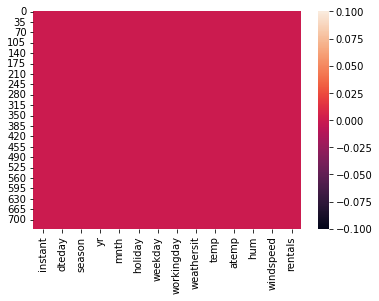

In [6]:
sns.heatmap(data.isnull())

**Split the Data**

Before creating pipline we need to split data into train and test

In [10]:
from sklearn.model_selection import train_test_split
X = data.drop('rentals',axis=1)
y = data['rentals']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((584, 13), (147, 13), (584,), (147,))

# Creating Pipline

Preprocessor

In [13]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Define numerical and categorical imputer sepratly

Firstly, we need to define the transformers for both 
numeric and categorical features. A transforming step is represented by a tuple. In that tuple, you first define the name of the transformer, and then the function you want to apply. 

In [16]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', OrdinalEncoder())
])

The next thing we need to do is to specify which columns are numeric and which are categorical, so we can apply the transformers accordingly. We apply the transformers to features by using ColumnTransformer.

In [18]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

preprocessor = ColumnTransformer([
                         ('numeric',numeric_transformer,numeric_features),
                         ('categorical',categorical_transformer,categorical_features)
])

Estimator

After assembling our preprocessor, we can then add in the estimator, which is the machine learning algorithm you’d like to apply, to complete our preprocessing and training pipeline. 

In [19]:
from sklearn.ensemble import RandomForestRegressor

pipline = Pipeline([
                    ('preprocessor',preprocessor),
                    ('regressor',RandomForestRegressor())
])


In [21]:
model = pipline.fit(x_train,y_train)

In [23]:
model.score(x_test,y_test)

0.8288880827476818

In [24]:
from sklearn.svm import SVR

pipeline_2 = Pipeline([
                            ('preprocessor',preprocessor),
                            ('regressor',SVR())
                            ])
pipeline_model_2 = pipeline_2.fit(x_train,y_train)

In [25]:
pipeline_model_2.score(x_test,y_test)

0.035618933025749255